### Dataset

TFKFace : https://drive.google.com/drive/folders/1HROmgviy4jUUUaCdvvrQ8PcqtNg2jn3G <br>
kaggle_age_prediction: https://www.kaggle.com/datasets/mariafrenti/age-prediction <br>
imdbface: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ <br>

### EDA

In [1]:
import pandas as pd
from glob import glob
from PIL import Image
import numpy as np
import torch
import torchvision

In [3]:
# UTKFace
files = glob("dataset/utkface/*/*.jpg")

In [5]:
len(files)

13648

In [6]:
files[0]

'dataset/utkface\\part1\\100_1_0_20170110183726390.jpg'

In [7]:
face_df = pd.DataFrame()

In [8]:
face_df['file_path'] = files

In [9]:
face_df['gender'] = list(map(lambda x: int(x.split('\\')[-1].split('_')[1]), files))

In [15]:
face_df = face_df[face_df['gender'].map(lambda x: x in [0,1])]

In [16]:
face_df['gender'].value_counts()

0    6939
1    6708
Name: gender, dtype: int64

In [20]:
face_df['age'] = face_df['file_path'].map(lambda x: int(x.split("\\")[-1].split("_")[0]))

In [61]:
face_df.head()

,file_path,age
0,dataset\utkface\part1\100_1_0_2017011018372639...,100
1,dataset\utkface\part1\100_1_2_2017010517484767...,100
2,dataset\utkface\part1\100_1_2_2017011018283672...,100
3,dataset\utkface\part1\101_1_2_2017010517473930...,101
4,dataset\utkface\part1\10_0_0_20161220222308131...,10


<AxesSubplot:>

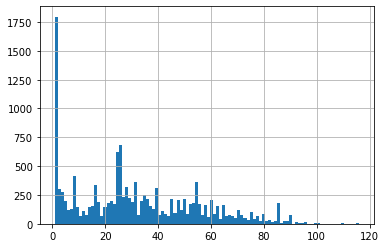

In [22]:
face_df['age'].hist(bins=100)

In [62]:
face_df.to_csv("./dataset/face_utkface.csv",index=False)

In [47]:
# kaggle
files2 = glob("dataset/*/*/*/*/*.jpg")

In [48]:
len(files2)

273640

In [54]:
face_df2 = pd.DataFrame()

In [55]:
face_df2['file_path'] = files2

In [57]:
face_df2.head()

,file_path
0,dataset\20-50\20-50\test\20\28492.jpg
1,dataset\20-50\20-50\test\20\28521.jpg
2,dataset\20-50\20-50\test\20\28681.jpg
3,dataset\20-50\20-50\test\20\28801.jpg
4,dataset\20-50\20-50\test\20\28815.jpg


In [58]:
face_df2['age'] = face_df2['file_path'].map(lambda x: int(x.split("\\")[-2]))

<AxesSubplot:>

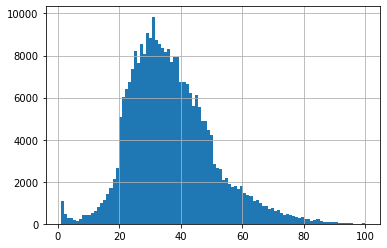

In [60]:
face_df2['age'].hist(bins=100)

In [63]:
face_df2.to_csv("./dataset/face_kaggle.csv",index=False)

In [65]:
a = torch.randn(1,2)

## AGNet

### config

In [32]:
config = {
    "data":{
        
    },
    "model":{
        
    }
}

### Base model

In [2]:
import torch
import torchvision

In [103]:
torch.nn.functional.one_hot(torch.tensor(10),num_classes=100)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [91]:
model = torchvision.models.resnet34(pretrained=True)

In [92]:
for name, param in model.named_parameters():
#     print(name)
    if 'fc' not in name:
        param.requires_grad = False
    else:
        print(name)

fc.weight
fc.bias


In [93]:
model.fc = torch.nn.Sequential(*[torch.nn.Linear(512, 100), torch.nn.ReLU()])

In [97]:
for i in model.parameters():
    print(i.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [99]:
torch.optim.SGD(filter(lambda x: x.requires_grad, model.parameters()), lr= 10)

SGD (
Parameter Group 0
    dampening: 0
    lr: 10
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### DataLoader

### Hyperparameter tuning

### Train model